In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [121]:
df = pd.read_csv('Delivery_Logistics.csv')
df.head()

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000008,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,no,delivered,5,640.1700
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000016,no,delivered,4,1448.1700
3,250.99,dhl,electronics,ev van,same day,east,cold,269.7,12.69,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,no,delivered,3,1486.5700
4,250.99,dhl,clothing,van,two day,north,foggy,256.7,37.02,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000016,no,delivered,4,1394.5600


In [122]:
df.shape

(25000, 15)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_id          25000 non-null  float64
 1   delivery_partner     25000 non-null  object 
 2   package_type         25000 non-null  object 
 3   vehicle_type         25000 non-null  object 
 4   delivery_mode        25000 non-null  object 
 5   region               25000 non-null  object 
 6   weather_condition    25000 non-null  object 
 7   distance_km          25000 non-null  float64
 8   package_weight_kg    25000 non-null  float64
 9   delivery_time_hours  25000 non-null  object 
 10  expected_time_hours  25000 non-null  object 
 11  delayed              25000 non-null  object 
 12  delivery_status      25000 non-null  object 
 13  delivery_rating      25000 non-null  int64  
 14  delivery_cost        25000 non-null  float64
dtypes: float64(4), int64(1), object(10)


In [124]:
df.columns

Index(['delivery_id', 'delivery_partner', 'package_type', 'vehicle_type',
       'delivery_mode', 'region', 'weather_condition', 'distance_km',
       'package_weight_kg', 'delivery_time_hours', 'expected_time_hours',
       'delayed', 'delivery_status', 'delivery_rating', 'delivery_cost'],
      dtype='object')

In [125]:
#Perbaiki format waktu
df['delivery_time_hours'] = pd.to_datetime(df['delivery_time_hours'])
df['expected_time_hours'] = pd.to_datetime(df['expected_time_hours'])

# Pecah format tanggal dan jam pada expected time hours
df['expected_date'] = df['expected_time_hours'].dt.strftime('%d-%m-%Y')
df['expected_time'] = df['expected_time_hours'].dt.strftime('%H:%M:%S')

# Pecah format tanggal dan jam pada delivery time hours
df['delivery_date'] = df['delivery_time_hours'].dt.strftime('%d-%m-%Y')
df['delivery_time'] = df['delivery_time_hours'].dt.strftime('%H:%M:%S')

# Ubah kolom ke date time
df['expected_date'] = pd.to_datetime(df['expected_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

# Create kolom tanggal keterlambatan
date_late = df['delivery_date'] - df['expected_date']
df['date_late'] = date_late

# Create kolom waktu keterlambatan
# Convert the 'HH:MM:SS' strings to Timedelta objects before subtraction
df['time_late'] = (pd.to_timedelta(df['delivery_time']) - pd.to_timedelta(df['expected_time']))
df['time_late'] = df['time_late'].astype(int)
df.head()

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost,expected_date,expected_time,delivery_date,delivery_time,date_late,time_late
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000008,no,delivered,3,1632.7206,1970-01-01,00:00:00,1970-01-01,00:00:00,0 days,0
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,no,delivered,5,640.1700,1970-01-01,00:00:00,1970-01-01,00:00:00,0 days,0
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000016,no,delivered,4,1448.1700,1970-01-01,00:00:00,1970-01-01,00:00:00,0 days,0
3,250.99,dhl,electronics,ev van,same day,east,cold,269.7,12.69,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,no,delivered,3,1486.5700,1970-01-01,00:00:00,1970-01-01,00:00:00,0 days,0
4,250.99,dhl,clothing,van,two day,north,foggy,256.7,37.02,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000016,no,delivered,4,1394.5600,1970-01-01,00:00:00,1970-01-01,00:00:00,0 days,0


In [126]:
df.columns

Index(['delivery_id', 'delivery_partner', 'package_type', 'vehicle_type',
       'delivery_mode', 'region', 'weather_condition', 'distance_km',
       'package_weight_kg', 'delivery_time_hours', 'expected_time_hours',
       'delayed', 'delivery_status', 'delivery_rating', 'delivery_cost',
       'expected_date', 'expected_time', 'delivery_date', 'delivery_time',
       'date_late', 'time_late'],
      dtype='object')

In [127]:
df.groupby('delivery_partner')['delivery_cost'].sum()

,delivery_cost
delivery_partner,
amazon logistics,2.353555e+06
blue dart,2.414735e+06
delhivery,2.362834e+06
dhl,2.445673e+06
ecom express,2.364798e+06
ekart,2.436777e+06
fedex,2.416028e+06
shadowfax,2.375779e+06
xpressbees,2.453436e+06


In [128]:
# Memilih semua kolom numerik yang relevan untuk analisis korelasi
correlation_data = df[[
    'distance_km',
    'package_weight_kg',
    'delivery_rating',      # Asumsi ini adalah numerik
    'delivery_cost'
]]

In [129]:
# Menghitung Matriks Korelasi Pearson
correlation_matrix = correlation_data.corr()
print("Matriks Korelasi:\n", correlation_matrix)

Matriks Korelasi:
                    distance_km  package_weight_kg  delivery_rating  \
distance_km           1.000000           0.002311        -0.132634   
package_weight_kg     0.002311           1.000000        -0.002891   
delivery_rating      -0.132634          -0.002891         1.000000   
delivery_cost         0.990772           0.099479        -0.160679   

                   delivery_cost  
distance_km             0.990772  
package_weight_kg       0.099479  
delivery_rating        -0.160679  
delivery_cost           1.000000  


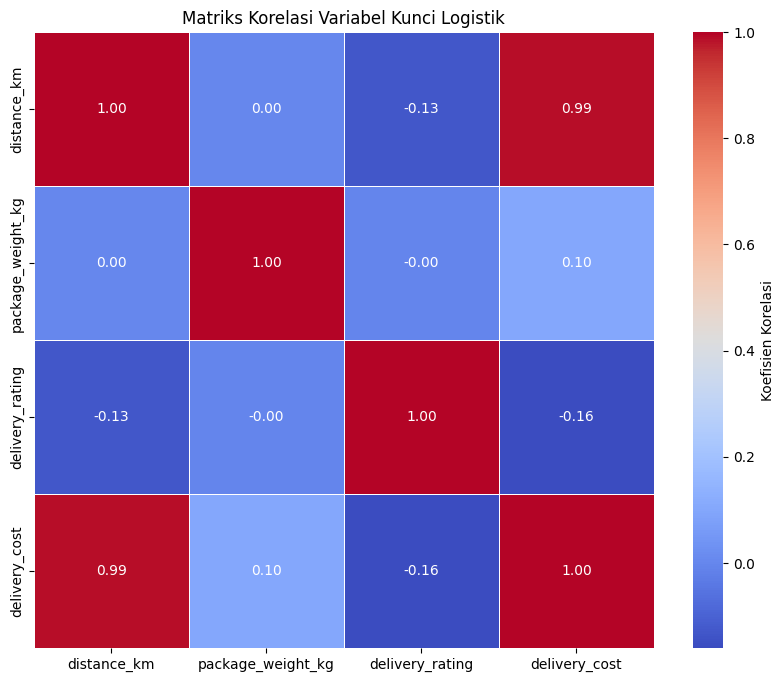

In [130]:
# Visualisasi Matriks Korelasi menggunakan Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, # Menampilkan nilai korelasi pada peta panas
    cmap='coolwarm', # Skema warna (cool untuk negatif, warm untuk positif)
    fmt=".2f", # Format dua angka desimal
    linewidths=.5, # Garis pemisah antar sel
    cbar_kws={'label': 'Koefisien Korelasi'}
)
plt.title('Matriks Korelasi Variabel Kunci Logistik')
plt.show()